In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# load the data
df = pd.read_csv("data/housing.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# check if it has missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# imputation to handle missing value
from sklearn.impute import KNNImputer

temp = df.copy()

# get the list of columns with numeric values
column_numeric = [col for col in temp.columns if temp[col].dtype != 'object']

# list of columns that contains atleast one missing values
missing_values = [col for col in temp.loc[:, temp.isnull().any()]]

# temp df with updated column with missing values
temp = temp[missing_values]

temp.head()

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0


In [10]:
knnImpute = KNNImputer(n_neighbors=3)

knnImpute.fit(temp)

# transform the data using the model
values = knnImpute.transform(temp)

temp = pd.DataFrame(values, columns=missing_values)

temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [13]:
# add the new column values to the original df

for col in missing_values:
    df[col] = temp.replace(df[col], df[col])

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

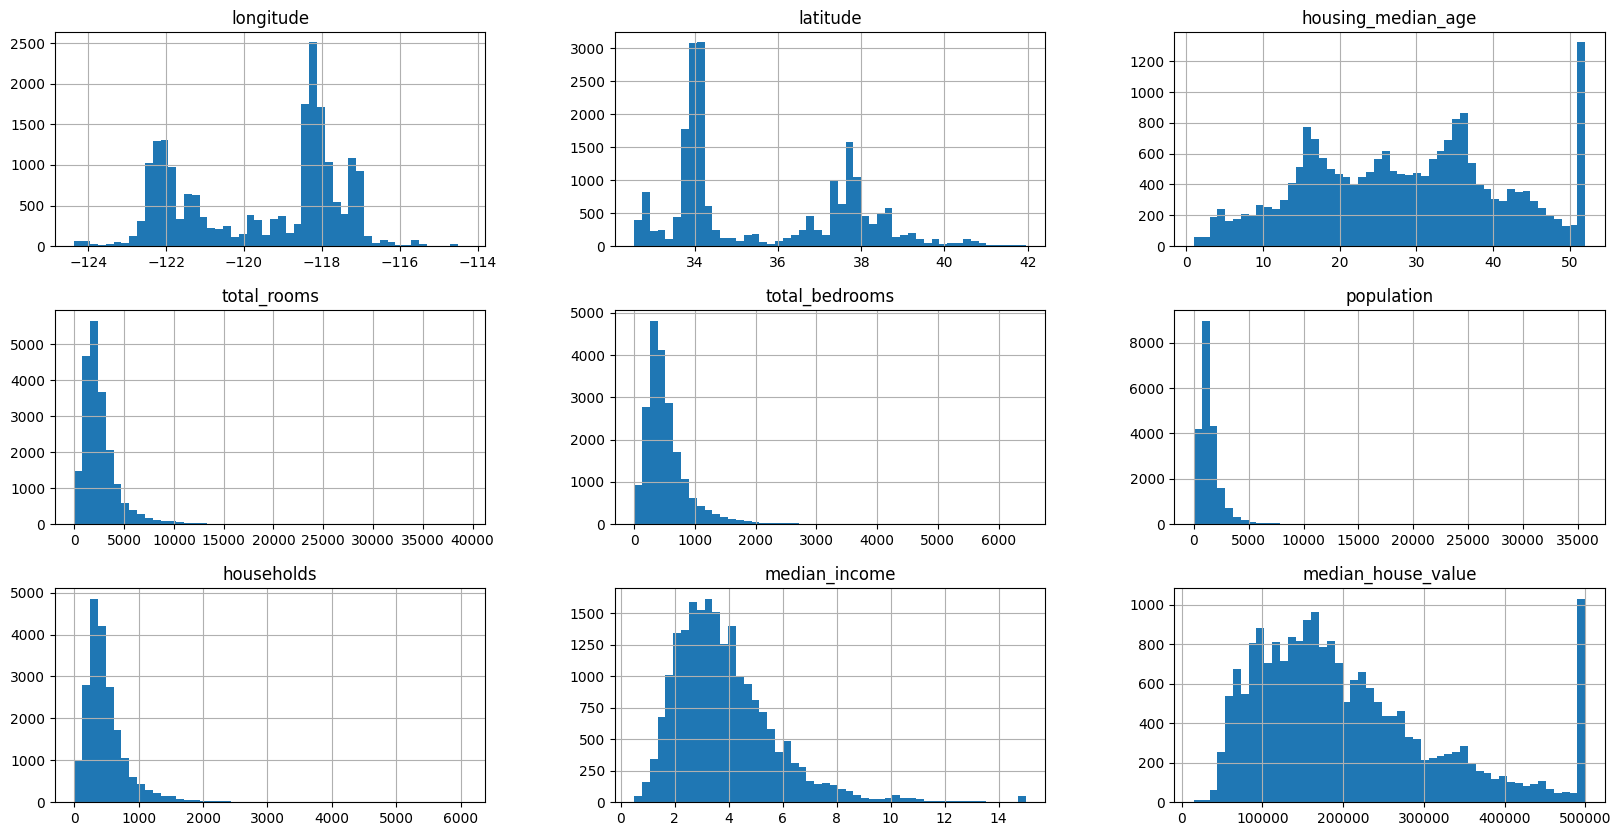

In [14]:
df.hist(bins=50, figsize=(20,10))

In [15]:
# correlation matrix
corr = df.corr(numeric_only=True)

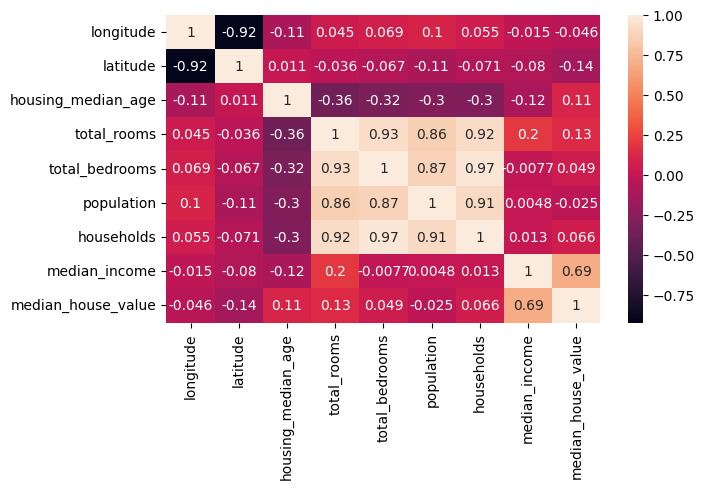

In [16]:
plt.figure(figsize = (7,4))

sns.heatmap(corr, annot=True)
plt.show()

In [20]:
# creating variables based on highly correlated attributes

# ratio of the total rooms to households
df['rooms_per_household'] = df['total_rooms']/df['households']

#  ratio of the total bedrooms to the total rooms 
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

#  ratio of the population to the households 
df['population_per_household']= df['population']/df['households']

# combining lat and long
df['coords'] = df['longitude']/df['latitude']


# remove the old attributes
df = df.drop('total_rooms', axis=1)
df = df.drop('households', axis=1)
df = df.drop('total_bedrooms', axis=1)
df = df.drop('population', axis=1)
df = df.drop('longitude', axis=1)
df = df.drop('latitude', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


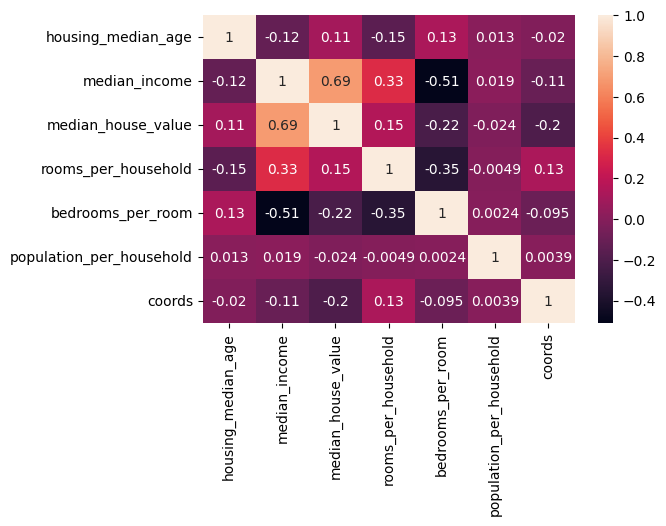

In [25]:
corr = df.corr(numeric_only=True) 

plt.figure(figsize = (6,4))

sns.heatmap(corr, annot=True)
plt.show()

In [28]:
# convert the categorical data to numerical using one shot method

# unique values
print(df.ocean_proximity.unique())

# value counts
print(df['ocean_proximity'].value_counts())

# make them numeric using pandas get_dummies
df_new = pd.get_dummies(data=df, columns=['ocean_proximity'])

df_new.head()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


In [31]:
# get them ready for training
# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
df_new.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in df_new.columns]

# Split target variable and feature variables
X = df_new[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = df_new['median_house_value']


In [32]:
# split train and test 70/30

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


In [33]:
# linear regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

# predict
y_pred_test = reg_model.predict(X_test)

pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

print(pred_test_df)

r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

         Actual      Predicted
20046   47700.0  103743.050896
3024    45800.0   92451.250932
15663  500001.0  219490.963844
20484  218600.0  283292.425471
9814   278000.0  244228.861575
...         ...            ...
17505  237500.0  210121.340663
13512   67300.0   74907.098235
10842  218400.0  216609.962950
16559  119400.0  127975.072923
5786   209800.0  202803.254310

[6192 rows x 2 columns]
R^2 Test: 0.56


In [36]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a  regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

y_rf_pred_test = rf_model.predict(X_test)

rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

print(rf_pred_test_df)

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2) *100))

         Actual  Predicted
20046   47700.0    47840.0
3024    45800.0    92680.0
15663  500001.0   446000.5
20484  218600.0   265320.0
9814   278000.0   240800.0
...         ...        ...
17505  237500.0   231680.1
13512   67300.0    69680.0
10842  218400.0   203930.0
16559  119400.0   126170.0
5786   209800.0   198160.0

[6192 rows x 2 columns]
R^2 - 75.0%


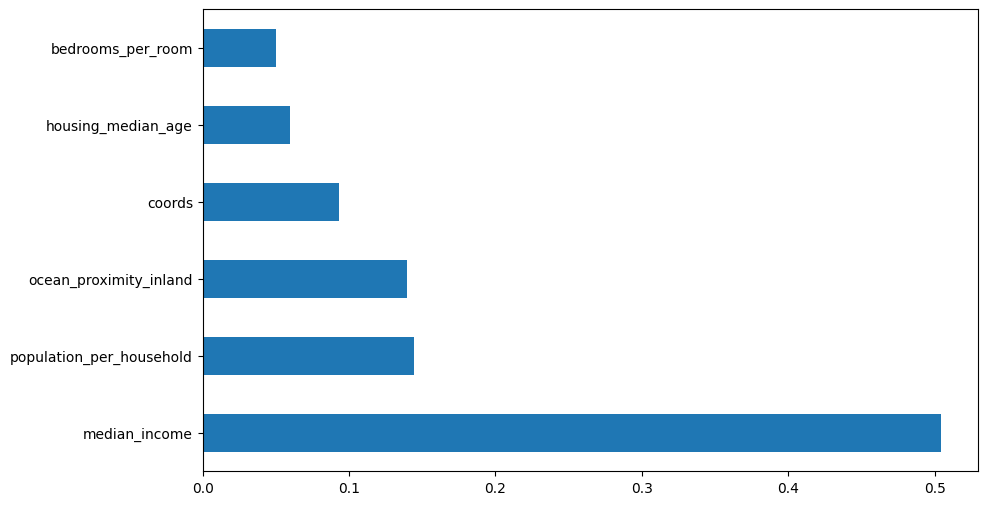

In [37]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)